# Proyecto SVD

INTEGRANTES:
- Amelie Ramírez
- Kamila Salas
- Diego Olivares

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Rutas

In [ ]:
ruta_data = "data\\data.npy"
ruta_info = "data\\info.xlsx"
ruta_test = "data\\test.npy"
ruta_votes = "data\\votes.npy"

## Parte 1:

El objetivo de esta pregunta es construir un identificador de rostros. La
matriz data.npy contiene 72 imagenes de rostros, correspondientes a 12 mujeres.
Puede cargar la matriz y mostrar las imagenes usando el siguiente c ́odigo:

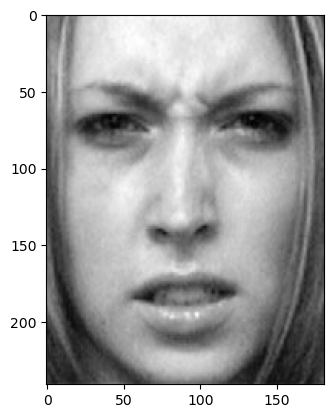

In [ ]:
# Cargar matriz
A = np.load(ruta_data)
# Mostrar la i-esima imagen

i = 0 # Cambiar si se quiere mostrar otra imagen
imagen = A[i].reshape((241, 181))
plt.imshow(imagen, cmap="gray")
plt.show()

Las filas est´an ordenadas de manera que las im´agenes correspondientes a
la primera persona est´an en las filas 1 a 6, las correspondientes a la segunda
persona en las filas 7 a 12, y as´ı.

### 1.1

Realice la SVD de la matriz A, y ´usela para proyectar las imagenes sobre
el espacio lineal de dimensi´on k que mejor las aproxima. Use valores de
k = 1, 5, 10, 25, 50 y 72. Elija un par de rostros, y para cada valor de k,
muestre los “rostros aproximados”(correspondientes a las proyecciones) y
comp´arelos con los originales.

In [ ]:
def truncated_svd(A, k):
    U, S, Vh = np.linalg.svd(A, full_matrices=False)
    return U[:, :k], S[:k], Vh[:k]

In [ ]:
def SVD_aprox(A):
    U_1, S_1, Vh_1 = truncated_svd(A, 1)
    U_5, S_5, Vh_5 = truncated_svd(A, 5)
    U_10, S_10, Vh_10 = truncated_svd(A, 10)
    U_25, S_25, Vh_25 = truncated_svd(A, 25)
    U_50, S_50, Vh_50 = truncated_svd(A, 50)
    U_72, S_72, Vh_72 = truncated_svd(A, 72)

    SVD_1 = U_1 @ np.diag(S_1) @ Vh_1
    SVD_5 = U_5 @ np.diag(S_5) @ Vh_5
    SVD_10 = U_10 @ np.diag(S_10) @ Vh_10
    SVD_25 = U_25 @ np.diag(S_25) @ Vh_25
    SVD_50 = U_50 @ np.diag(S_50) @ Vh_50
    SVD_72 = U_72 @ np.diag(S_72) @ Vh_72

    return [A, SVD_1, SVD_5, SVD_10, SVD_25, SVD_50, SVD_72]


In [ ]:
lista_SVD = SVD_aprox(A)
lista = ["Original", "1", "5", "10", "25", "50", "72"]

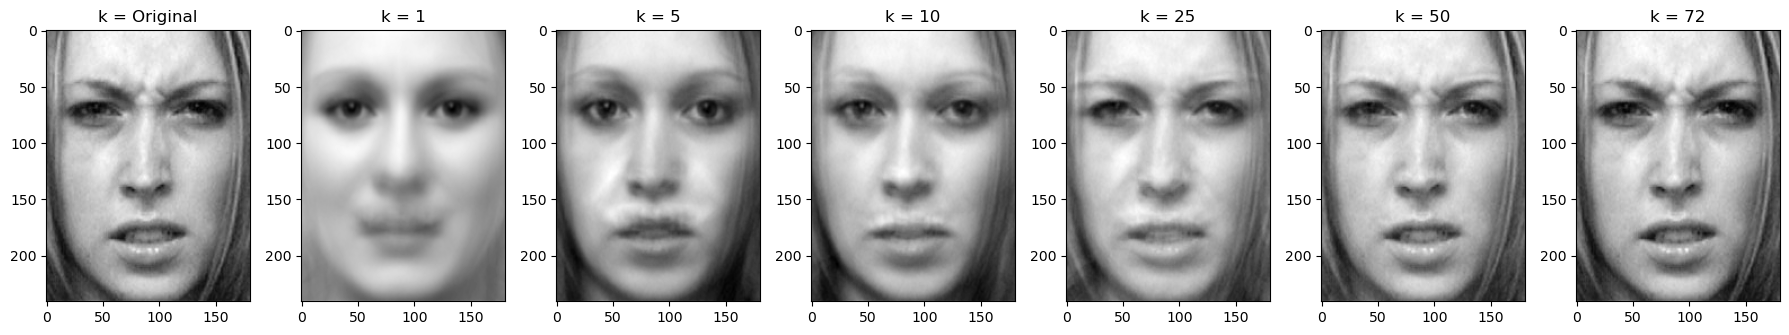

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(18, 4))  # 1 fila, 6 columnas

for s in range(len(lista_SVD)):
    ax = axes[s]

    SVD = lista_SVD[s]
    i = 0  # índice de imagen a mostrar
    imagen = SVD[i].reshape((241, 181))
    
    ax.set_title("k = " + lista[s])
    ax.imshow(imagen, cmap="gray")

plt.tight_layout()
plt.show()

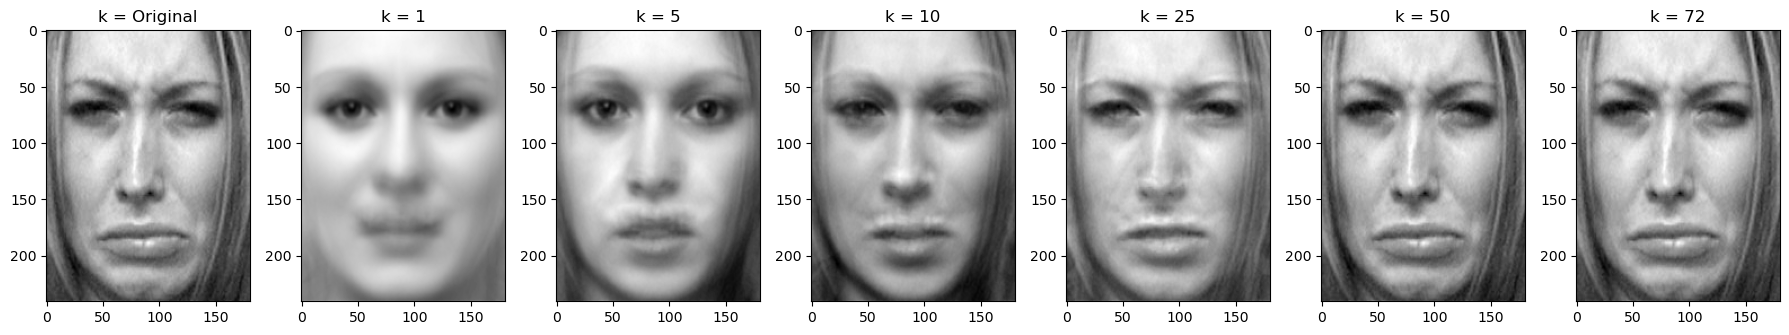

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(18, 4))  # 1 fila, 6 columnas

for s in range(len(lista_SVD)):
    ax = axes[s]

    SVD = lista_SVD[s]
    i = 1  # índice de imagen a mostrar
    imagen = SVD[i].reshape((241, 181))
    
    ax.set_title("k = " + lista[s])
    ax.imshow(imagen, cmap="gray")

plt.tight_layout()
plt.show()

### 1.2

Realice PCA a la matriz A (es decir, el paso anterior pero centrando los datos previamente), y ´usela para proyectar las imagenes sobre el espacio af´ın
de dimensi´on k que mejor las aproxima. Use valores de k = 1, 5, 10, 25, 50
y 72. Nuevamente, para cada k, muestre un par de “rostros aproximados”
y comp´arelos con los originales. Recuerde descentrar las im´agenes una vez
proyectadas

In [ ]:
def S(A):
    promedio = np.mean(A, axis=0)
    return A - promedio, promedio

PCA, promedio = S(A)

lista_SVD = SVD_aprox(PCA)

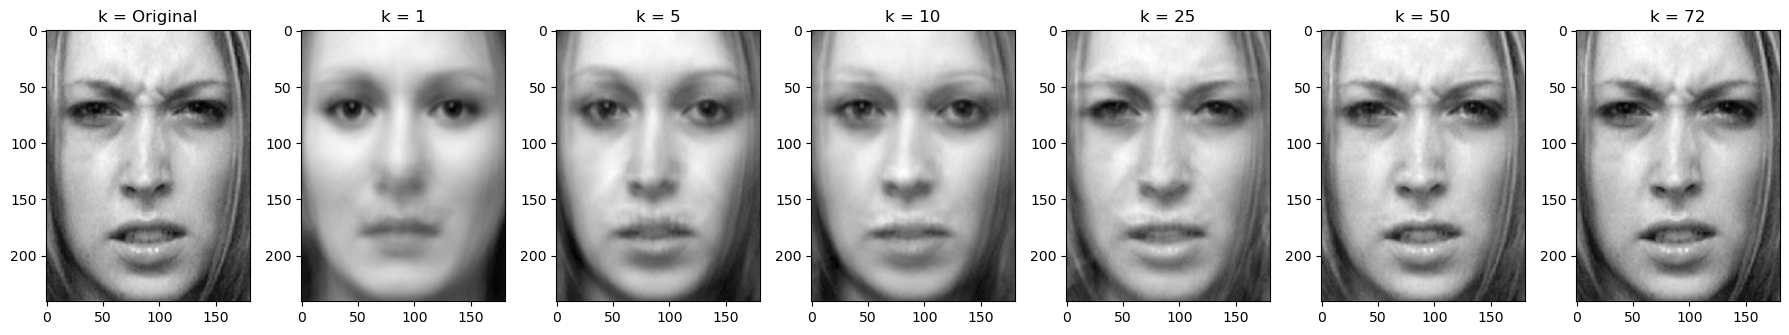

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(18, 4))  # 1 fila, 6 columnas

for s in range(len(lista_SVD)):
    ax = axes[s]

    SVD = lista_SVD[s] + promedio
    i = 0 # índice de imagen a mostrar
    imagen = SVD[i].reshape((241, 181))
    
    ax.set_title("k = " + lista[s])
    ax.imshow(imagen, cmap="gray")

plt.tight_layout()
plt.show()

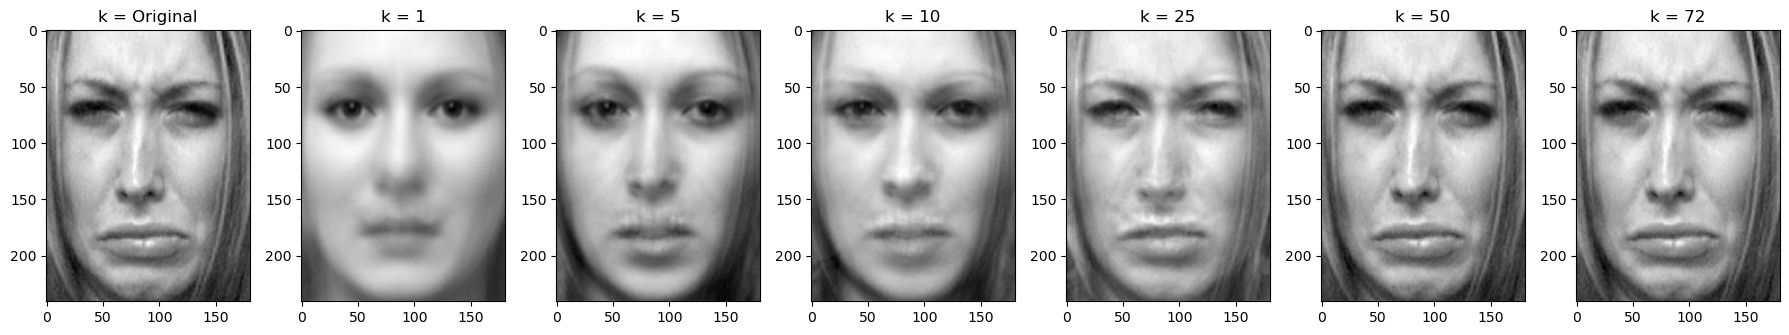

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(18, 4))  # 1 fila, 6 columnas

for s in range(len(lista_SVD)):
    ax = axes[s]

    SVD = lista_SVD[s] + promedio
    i = 1 # índice de imagen a mostrar
    imagen = SVD[i].reshape((241, 181))
    
    ax.set_title("k = " + lista[s])
    ax.imshow(imagen, cmap="gray")

plt.tight_layout()
plt.show()

### 1.3
Muestre una tabla donde se compare el error cuadr´atico medio de las aproximaciones encontradas en los items anteriores (es decir, para los valores
de k mencionados, y tanto para el caso centrado como el no centrado).
Recuerde que este error esta dado por la f´ormula

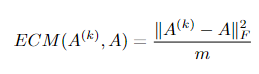

donde A(k) contiene las proyecciones de las imagenes como filas, y m es la
cantidad de im´agenes. Comente.

### 1.4
Visualize los datos como puntos, proyect ́andolos en sus dos primeras com-
ponentes principales. Coloree los rostros correspondientes a una misma
persona de un mismo color, y use colores distintos para rostros de perso-
nas distintas. Para mayor claridad, muestre los datos correspondientes a
las dos primeras personas

### 1.5

Repita el paso anterior, proyectando ahora sobre la tercera y cuarta com-
ponentes principales, y luego sobre la quinta y sexta. Comente. En parti-
cular, responda: ¿qu ́e par de componentes (1 y 2 vs 3 y 4 vs 5 y 6) parece
ser m ́as relevante para separar a las 2 primeras personas? ¿C ́omo explica
esto?

### 1.6

La matriz test.npy contiene seis im ́agenes, tres de ellas correspondientes
a rostros y tres de ellas correspondientes a otros objetos cotidianos. Vi-
sualice las seis im ́agenes. Luego, aprox ́ımelas proyectandolas sobre las 20 primeras componentes principales (de la misma matriz A anterior con los
72 rostros), y visualice esta aproximaci ́on. Comente sobre la calidad de
las aproximaciones obtenidas. ¿Que imagenes se aproximan bien sobre las
componentes principales de A? ¿Porqu ́e?

### 1.7

Basado en el punto anterior, proponga un m ́etodo que permita distinguir
si una foto corresponde a un rostro o no (s ́olo se pide describirlo, no es
necesario que lo implemente). Fundamente su propuesta

## Parte 2

El objetivo de esta pregunta es obtener una visualizaci ́on sobre las posi-
ciones pol ́ıticas de los distintos miembros de la c ́amara de diputados de Chile.
En el archivo votes.csv se encuentra la informaci ́on sobre los votos de cada
diputado/a en el a ̃no 2022 sobre las distintas propuestas de leyes revisadas. Es-
tos votos toman el valor 1 (apruebo), 0 (abstengo) y −1 (rechazo). Adem ́as, se
da informaci ́on sobre el partido pol ́ıtico de cada persona (columna party).

In [37]:
#librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 2.1

Realice una exploraci ́on de los datos. En particular notar ́a que hay varios
valores Nan. ¿C ́omo los interpretar ́ıa

In [7]:
#importacion el csv con pandas para su correcta lectura 
votes = pd.read_csv("data\\votes.csv")
votes.head()

,Diputado/a,38467,38468,38469,38474,38475,38476,38477,38478,38487,...,40434,40435,40436,40437,40438,40439,40440,40441,40442,party
0,"Ahumada Palma, Yovana",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PDG
1,"Fuenzalida Cobo, Juan",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
2,"Ossandón Irarrázabal, Ximena",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
3,"Alessandri Vergara, Jorge",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
4,"González Villarroel, Mauro",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN


In [19]:
#haremos una exploración rapida de los datos
#primero verificamos que tipo de datos estamos tratandp
votes.dtypes


Diputado/a     object
38467         float64
38468         float64
38469         float64
38474         float64
               ...   
40439         float64
40440         float64
40441         float64
40442         float64
party          object
Length: 1035, dtype: object

In [21]:
#luego una informacion base de los datos
votes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Columns: 1035 entries, Diputado/a to party
dtypes: float64(1033), object(2)
memory usage: 1.2+ MB


In [23]:
#por ultimo veremos cuantas cantidades de aprobados, rechazado y abstenencia tenemos
#de paso verificaremos la existencia de nulos
# Contar cantidad de 1's
count_ones = (votes == 1).sum().sum()

# Contar cantidad de -1's
count_noones = (votes == -1).sum().sum()

# Contar cantidad de 0's
count_zeros = (votes == 0).sum().sum()

# Contar cantidad de valores nulos
count_nulls = votes.isnull().sum().sum()

print(f"Cantidad de 1's: {count_ones}")
print(f"Cantidad de -1's: {count_noones}")
print(f"Cantidad de 0's: {count_zeros}")
print(f"Cantidad de valores nulos: {count_nulls}")

Cantidad de 1's: 105403
Cantidad de -1's: 24915
Cantidad de 0's: 7789
Cantidad de valores nulos: 20975


Verificamos correctamente la existencia de muchos 0, lo interpretaria como la inasistencia de los diputados o un error de datos cuando se marcaron como "abstengo"

### 2.2

Hay varios m ́etodos que se pueden usar para lidiar con datos faltantes.
Para el caso de este problema, algunas alternativas son:

    i) Eliminar las filas o columnas que contengan alg ́un elemento nulo.

    ii) Reemplazarlo por el valor del voto promedio en esa votaci ́on, entre todos los diputados que no presenten valores nulos.

    iii) Reemplazarlo por el valor del voto promedio en esa votaci ́on, entre los diputados de la misma bancada que no tengan valores nulos.
    
La primera opci ́on no es viable en nuestro caso, ya que en casi todas las
filas y columnas de nuestros datos se encuentra alg ́un valor nulo, por lo
que enfrentar ́ıamos una reducci ́on muy dr ́astica en la cantidad de datos.

#### 2.2.a

Reemplace los valores nulos, usando la segunda opci ́on. Proyecte los
datos (centrandolos previamente) sobre el subespacio de dimensi ́on
2 que mejor los aproxime. Plotee los datos sobre este subespacio,
coloreando cada punto de acuerdo a su partido pol ́ıtico.

In [29]:
#copiaremos el df para evitar errores
votos_co = votes.copy()

In [39]:
#primero reemplazaremos los valores nulos
#creamos una funcion para tener los promedios
def promedio_manual_serie(serie):
    valores = serie.dropna().values
    suma = np.sum(valores)
    n = len(valores)
    return int(suma / n)  # redondeado al entero más cercano

#hacemos el reemplazo
for columna in votos_co:
    #utilizamos solo los valores de las votaciones
    if votos_co[columna].dtype in ['float64']:
        promedio = promedio_manual_serie(votos_co[columna])
        #verificamos que el promedio sea un valor de acuerdo a lo analisado (-1, 0 o 1)
        print(f"Promedio de la columna {columna}: {promedio}")
        #cambiamos el valor nulo por el proedio calculado
        votos_co[columna] = votos_co[columna].fillna(promedio)

#aprovechamos de verificar si existen nulos
count_nulls = votos_co.isnull().sum().sum()
print(f"Cantidad de valores nulos: {count_nulls}")

Promedio de la columna 38467: 0
Promedio de la columna 38468: 0
Promedio de la columna 38469: 0
Promedio de la columna 38474: 0
Promedio de la columna 38475: 0
Promedio de la columna 38476: 1
Promedio de la columna 38477: 0
Promedio de la columna 38478: 1
Promedio de la columna 38487: 0
Promedio de la columna 38488: 0
Promedio de la columna 38489: 0
Promedio de la columna 38490: 0
Promedio de la columna 38491: 1
Promedio de la columna 38494: 0
Promedio de la columna 38495: 0
Promedio de la columna 38498: 1
Promedio de la columna 38499: 0
Promedio de la columna 38500: 0
Promedio de la columna 38501: 1
Promedio de la columna 38502: 0
Promedio de la columna 38503: 1
Promedio de la columna 38504: 1
Promedio de la columna 38508: 0
Promedio de la columna 38509: 0
Promedio de la columna 38510: 0
Promedio de la columna 38511: 0
Promedio de la columna 38512: 0
Promedio de la columna 38513: 0
Promedio de la columna 38514: 0
Promedio de la columna 38515: 0
Promedio de la columna 38516: 0
Promedio

In [ ]:
#crearemos funcioes utilis para la futura proyeccion
# funcion de promedio para matrices
def calcular_promedio_manual(A):
    n = A.shape[0]
    suma_col = np.sum(A, axis=0)
    promedio = suma_col / n
    return promedio

#funcion para centrar los datos ocupando 
def centrar_datos_manual(A):
    promedio = calcular_promedio_manual(A)
    A_centrada = A - promedio
    return A_centrada, promedio

# funcion de svd dada por el enunciadp
def truncated_svd(A, k):
    U, S, Vh = np.linalg.svd(A, full_matrices=False)
    return U[:, :k], S[:k], Vh[:k]

C:\Users\ameli\AppData\Local\Temp\ipykernel_16424\1527145597.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_parties))


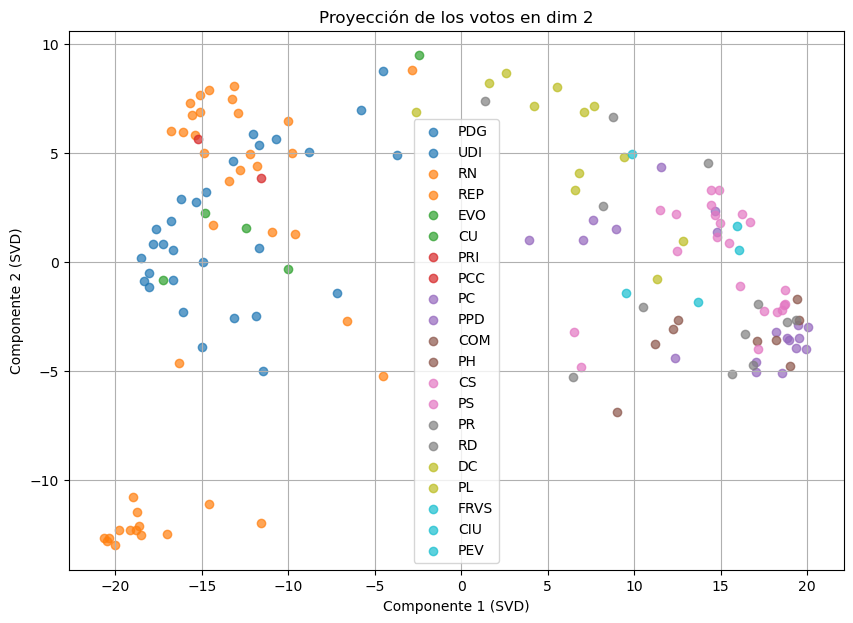

In [43]:
#seleccionamos las columnas de los votos y las pasamos a matriz
numeric_cols = votos_co.select_dtypes(include=[np.number]).columns
X = votos_co[numeric_cols].values

#centramos los datos con la funcion creada
X_centrada, promedio = centrar_datos_manual(X)

#aplicamos la funcion creada de svd con k=2
U, S, Vh = truncated_svd(X_centrada, 2)

#proyectamos los datos al subespacio de dimensión 2
X_proj = np.dot(X_centrada, Vh.T)

#creamos el grafico con colores por cada partido
parties = votos_co['party']
unique_parties = parties.unique()
colors = plt.cm.get_cmap('tab10', len(unique_parties))

plt.figure(figsize=(10,7))
for i, party in enumerate(unique_parties):
    idx = parties == party
    plt.scatter(X_proj[idx, 0], X_proj[idx, 1], label=party, alpha=0.7, color=colors(i))

plt.xlabel('Componente 1 (SVD)')
plt.ylabel('Componente 2 (SVD)')
plt.title('Proyección de los votos en dim 2')
plt.legend()
plt.grid(True)
plt.show()


#### 2.2.b

Ahora, reemplace los valores nulos usando la tercera opci ́on. Proyecte
estos datos sobre el subespacio de dimensi ́on 2 que mejor los aproxi-
me. Plotee los datos sobre este subespacio, coloreando cada punto de
acuerdo a su partido pol ́ıtico.

In [44]:
#primero realizaremos otra copia de los datos originales
votos_b = votes.copy()

In [49]:
#reemplazaremos los votos nulos segun la opcion 3
#seleccionamos las columnas que solo son votos 
columnas_votos = votos_b.select_dtypes(include=[np.number]).columns

#recorremos estas columnas
for columna in columnas_votos:
    #recorremos la columna de los partidos
    for partido in votos_b['party'].unique():
        #sacamos las filas del partido
        miembros_partido = votos_b[votos_b['party'] == partido]
        #seleccionamos los votos no nulos para el promedio
        valores = miembros_partido[columna].dropna().values
        #calculamos el promedio
        if len(valores) > 0:
            promedio = int(np.sum(valores) / len(valores))
            print( "El promedio de la columna", columna, "es" ,promedio)
            #reemplazamos los nulos en esa votación y partido
            votos_nulos = (votos_b['party'] == partido) & (votos_b[columna].isnull())
            votos_b.loc[votos_nulos, columna] = promedio

# Revisamos si quedan valores nulos
total_nulos = votos_b.isnull().sum().sum()
print(f"Valores nulos restantes: {total_nulos}")

El promedio de la columna 38467 es 1
El promedio de la columna 38467 es 1
El promedio de la columna 38467 es 0
El promedio de la columna 38467 es 1
El promedio de la columna 38467 es 1
El promedio de la columna 38467 es 1
El promedio de la columna 38467 es 1
El promedio de la columna 38467 es 1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es 0
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38467 es -1
El promedio de la columna 38468 es 0
El promedio de la columna 38468 es 1
El promedio de la columna 38468 es 1
El promedio de la columna 38468 es 1
El promedio de la columna 38468 es 1
El promedio de la columna 

C:\Users\ameli\AppData\Local\Temp\ipykernel_16424\2288424160.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_parties))


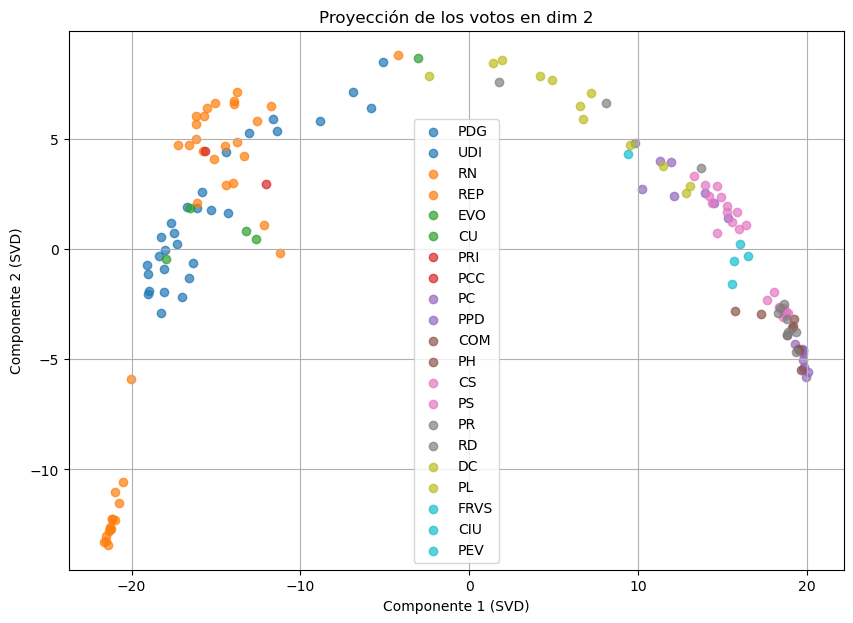

In [50]:
#seleccionamos las columnas de los votos y las pasamos a matriz
numeric_cols = votos_b.select_dtypes(include=[np.number]).columns
X = votos_b[numeric_cols].values

#centramos los datos con la funcion creada
X_centrada, promedio = centrar_datos_manual(X)

#aplicamos la funcion creada de svd con k=2
U, S, Vh = truncated_svd(X_centrada, 2)

#proyectamos los datos al subespacio de dimensión 2
X_proj = np.dot(X_centrada, Vh.T)

#creamos el grafico con colores por cada partido
parties = votos_b['party']
unique_parties = parties.unique()
colors = plt.cm.get_cmap('tab10', len(unique_parties))

plt.figure(figsize=(10,7))
for i, party in enumerate(unique_parties):
    idx = parties == party
    plt.scatter(X_proj[idx, 0], X_proj[idx, 1], label=party, alpha=0.7, color=colors(i))

plt.xlabel('Componente 1 (SVD)')
plt.ylabel('Componente 2 (SVD)')
plt.title('Proyección de los votos en dim 2')
plt.legend()
plt.grid(True)
plt.show()

#### 2.2.c

Comente sobre los resultados obtenidos en ambos casos. En particu-
lar, ¿observa una divisi ́on entre los pol ́ıticos de partidos de derecha
con los partidos de izquierda? ¿Que protocolo de reemplazo de valores
nulos parece m ́as razonable?
3